Author: Fejiro Obor

Statistics & Public Health 1 Deliverable: Cleaning and EDA

# Prevalence of West Nile Virus (WNV)  in Chicago, IL between 2008 - 2019

West Nile Virus (WNV) is a common illness that is usually spread by mosquitoes. The virus has consistently been reported to be linked with sevaral cases of illness near Chicago, Illinois. Using data obtained from the city of Chicago on mosquito populations and WNV presence between 2007 to 2019, we will perform EDA and data wrangling to better understand presence of this virus within the city.

## Preliminary Data Exploration

Firstly, we need to install geopandas as our script depends on it. Next we will import the required libraries and read in the provided csv data

In [1]:
# pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

sns.set_palette("dark:#5A9_r")
sns.set_style('whitegrid')

In [3]:
# read csv
df = pd.read_csv('mosquito_data.csv')
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


Next, we will begin to explore the data further starting with understanding the features provided

In [4]:
# checking the dimensions of the dataset
df.shape

(18495, 13)

In [5]:
# getting an overview of the dataset's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


The data provided consists of 18,495 rows and 13 columns, all of which have different data types. A snapshot of each column by data type is shown below:

In [6]:
# top rows for 'object' type only columns
df.select_dtypes('object').head()

,Address Block,Trap,Trap type,Date,Mosquito ID,WNV Present,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS


In [7]:
# top rows for 'int' type only columns
df.select_dtypes('int').head()

,Year,Week,Block,Mosquito number
0,2019,39,100,2
1,2019,39,52,1
2,2019,39,58,2
3,2019,39,39,1
4,2019,39,131,9


In [8]:
# top rows for 'float' type only columns
df.select_dtypes('float').head()

,Lat,Lon
0,NaN,NaN
1,41.798211,-87.736925
2,41.987245,-87.689417
3,41.953664,-87.724987
4,41.657069,-87.546049


Since the date provided in the data is currently in 'string' format, we will need to convert it to datetime format

In [9]:
type(df['Date'][0])

str

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

The 'Block' column seems redundant as it is already represented in the 'Address Block' column. We will go ahead and remove it from our dataframe.

In [11]:
df.drop(columns='Block', inplace=True)

Next, we will look at more details about each of the columns availabe:

In [15]:
df.describe(include = 'all')

/var/folders/hv/t_gjznjj49ddynn53nsvvxnc0000gn/T/ipykernel_59907/4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
count,18495.000000,18495.000000,18495,18495,18495,18495,18495.000000,18495,18495,18495,15571.000000,15571.000000
unique,NaN,NaN,154,190,4,298,NaN,4,2,4,NaN,NaN
top,NaN,NaN,100XX W OHARE AIRPORT,T002,GRAVID,2016-08-11 00:08:00,NaN,Res,negative,CULEX RESTUANS,NaN,NaN
freq,NaN,NaN,2039,406,17741,244,NaN,11866,14501,11866,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2007-05-29 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-09-26 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012.905812,31.004001,NaN,NaN,NaN,NaN,10.879913,NaN,NaN,NaN,41.839963,-87.691642
std,3.725857,4.332020,NaN,NaN,NaN,NaN,13.475066,NaN,NaN,NaN,0.111374,0.076545
min,2007.000000,20.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,41.644720,-87.854473
25%,2010.000000,28.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,41.742670,-87.747459


From the table above, we can see that the data was collected between 2007 to 2019. The data was also not collected all-year round, instead, it was collected only between the 20th and 40th weeks of the years sampled (i.e between May - October). Other noteworthy points include:

* Out of all the locations sampled, most samples were collected from 100XX W OHARE AIRPORT.
* 4 unique trap types were used, of which GRAVID type was the most frequently used.
* Although the number of mosquitoes collected at a time ranged from 1 to 50, the average number observed was 10.9.
* The dataset is also not balanced regarding the presence of WNV. Most of the mosquitoes collected were WNV Negative compared to Positive.
* CULEX RESTUANS species was the most observed out of the 4 total unique species observed
* Based on the count of Latitude & Longitude provided, both columns are incomplete.

Two categorical columns we can explore further are 'WNV Present' & 'Species'

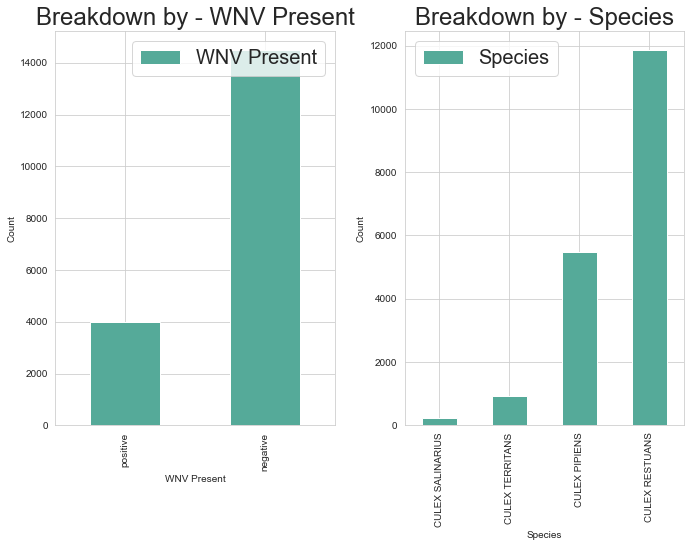

In [16]:
categ_columns = ['WNV Present','Species']

# plotting the breakdown of our data by WNV Presence & Mosquito Species

plt.subplots(1,2,figsize=(10,8))
plot_num=1

for column in categ_columns:
    
    plt.subplot(1,2,plot_num)
    df.groupby(column)[column].count().sort_values().plot(kind = 'bar')
    plt.rcParams['font.size'] = 20
    plt.title('Breakdown by - '+ column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plot_num +=1

plt.tight_layout()
plt.show()

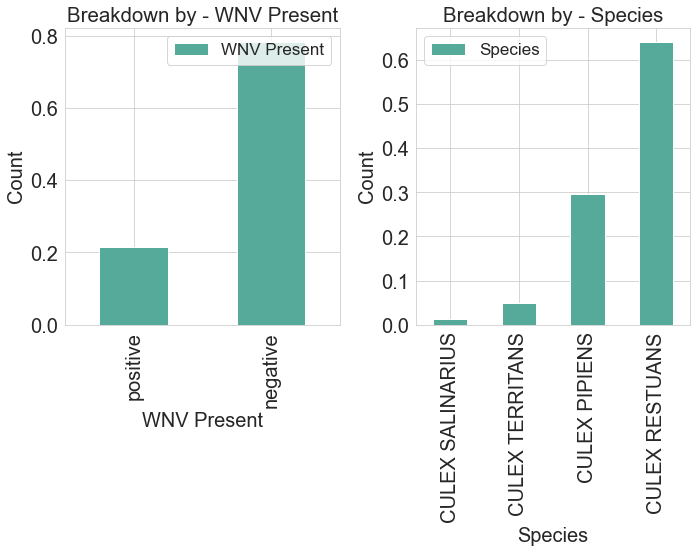

In [17]:
# plotting the breakdown of our data by WNV Presence & Mosquito Species observed on a normalized scale

plt.subplots(1,2,figsize=(10,8))
plot_num2=1
for column in categ_columns:
    
    plt.subplot(1,2,plot_num2)
    df[column].value_counts(normalize = True).sort_values().plot(kind = 'bar')
    plt.rcParams['font.size'] = 17
    plt.title('Breakdown by - '+ column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plot_num2 +=1

plt.tight_layout()
plt.show()

As seen above, 78% of the mosquitoes collected during the study tested negative for WNV compared to 22% which tested negative. This means that there were almost 4 times more WNV negative cases within our data compared to positive cases.

CULEX RESTUANS represents 64% of the mosquito sample collected around the city. This was the most observed mosquitoes Species, followed by CULEX PIPIENS which represented 30% of the sample. CULEX TERRITANS & CULEX SALINARIUS were the least observed Species and represent only 6% of the data.

Two numeric columns we can explore further are 'Week' & 'Mosquito number'

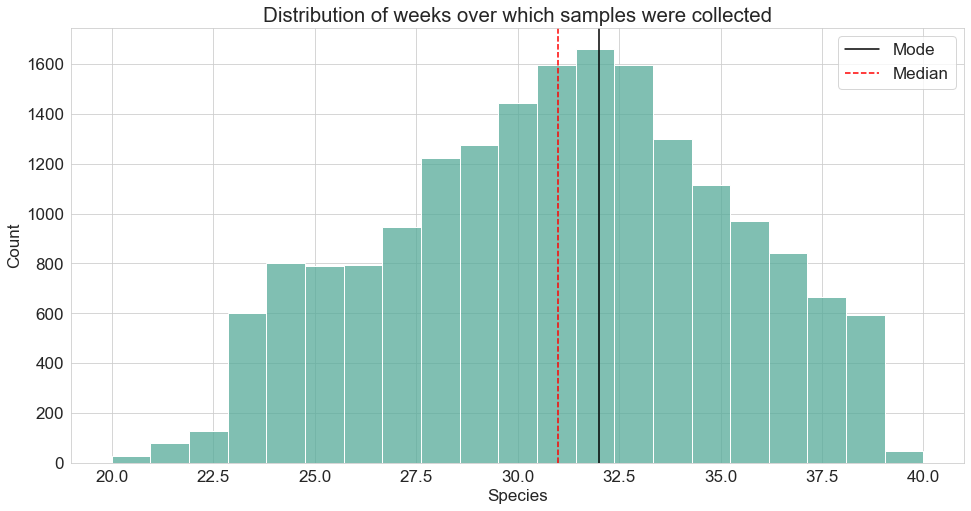

In [18]:
# plotting the distribution of the 'Week' column
plt.figure(figsize=(16, 8))
sns.histplot(x = df['Week'], bins = 21)
plt.axvline(df['Week'].mode()[0], color = "black")
plt.axvline(df['Week'].median(), color = "red", linestyle = '--')
plt.title('Distribution of weeks over which samples were collected')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(labels = ['Mode', 'Median'])
plt.rcParams['font.size'] = 15
plt.show()

The week number ranges from 20 to 40 which corresponds with the months of May to September.

Week 20-22: May

Week 22-35: June, July, August

Week 36-40: September


From the plot above, the distribution of the data in the 'Week' column is normally distributed. We can see that more mosquito samples were collected during the mid point of the sampling period (July - August) while less samples were collected at the tail ends (May/September). This is expected seeing as this period is when the city also experiences higher temperatures and rainfaill.

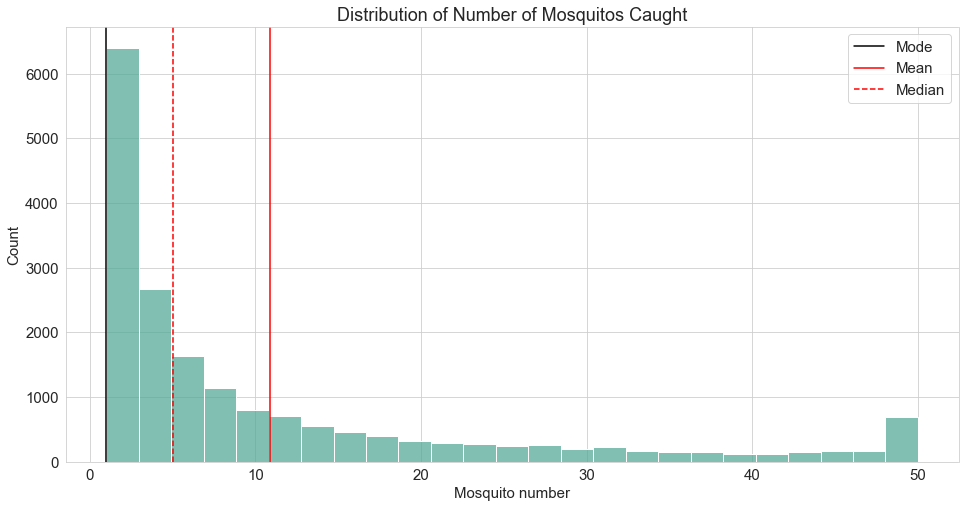

In [19]:
# plotting the distribution of the 'Mosquito number' column
plt.figure(figsize=(16, 8))
sns.histplot(x = df['Mosquito number'], bins = 25)
plt.axvline(df['Mosquito number'].mode()[0], color = "black")
plt.axvline(df['Mosquito number'].mean(), color = "red")
plt.axvline(df['Mosquito number'].median(), color = "red", linestyle = '--')
plt.title('Distribution of Number of Mosquitos Caught')
plt.legend(labels = ['Mode','Mean', 'Median'])
plt.rcParams['font.size'] = 15
plt.show()

From the plot above, we can see that the distribution of 'Mosquito number' is not normally distributed rather it is skewed to the right. It shows that a small number of mosquito samples (less than 4) were typically collected in each trap for more about 50% of the samples.

## Checking for null values 

In [ ]:
df.isna().sum(axis = 0)

We are missing 2924 rows of longitude & latitude data. We will try to populate the missing data using longitude & latitude of nearby addresses within our dataframe.

First, here are the unique streets we are missing longitude and latitude for:

In [ ]:
# Take unique rows where 'Lat' is null
missing_coords = pd.DataFrame(df[pd.isnull(df["Lat"])]["Address Block"].unique())

# Adding only the street name as a separate column
street = []
for i in range(0,len(missing_coords)):
    x = missing_coords[0][i].split(" ")
    street.append(x[1] + " " + x[2])

missing_coords["street"] = street
missing_coords

Next, we will search our dataframe for rows matching the unique street names above. Then we will take the Longitude & Latitude of the closest address.

In [ ]:
# Take rows where 'Lat' is not null as our available coordinates
available_coords = pd.DataFrame(df[~pd.isnull(df["Lat"])][["Address Block", "Lat", "Lon"]])

closestAddress = []
closestLatitude = []
closestLongitude = []

# If street name in the available coordinates dataframe matches any of the street names in the missing coordinates
# dataframe, then take the first address returned as the closest.

for i in range(0,len(missing_coords)):
    streetname = missing_coords["street"][i]
    matching_recs = pd.DataFrame(available_coords[available_coords["Address Block"].str.contains(streetname)])
    if matching_recs.empty: # If no nearby address found, append NaN, else append nearest address
        closestLatitude.append(np.nan)
        closestLongitude.append(np.nan)
        closestAddress.append(np.nan)
    else:
        closestLatitude.append(matching_recs.iloc[0]["Lat"])
        closestLongitude.append(matching_recs.iloc[0]["Lon"])
        closestAddress.append(matching_recs.iloc[0]["Address Block"])

missing_coords["Closest Address"] = pd.DataFrame(closestAddress)
missing_coords["Lat"] = pd.DataFrame(closestLatitude)
missing_coords["Lon"] = pd.DataFrame(closestLongitude)
missing_coords

It looks like we are still missing coordinates for 3 distinct streets. Since the missing data is few, we can manually input the missing coordinates found on Google:
- W OHARE AIRPORT: [41.9741625, -87.9073214]
- S CHICAGO: [41.7345874, -87.5513222]
- S AVENUE: [41.709293, -87.5315843]

Next, we can add the new data into the original dataframe.

In [ ]:
missing_data = {'street': ['W OHARE', 'S CHICAGO', 'S AVENUE'],
                'Lat': [41.9741625, 41.7345874, 41.709293],
                'Lon': [-87.9073214, -87.5513222, -87.5315843]}

missing_data = pd.DataFrame.from_dict(missing_data)

# use missing_data to populate rows missing_coords in where Lon & Lat are NaN
for i in range(0,len(missing_coords)):
    if str(missing_coords["Closest Address"][i]) == 'nan':
        for j in range(0,len(missing_data)):
            if missing_data["street"][j] == missing_coords["street"][i]:
                missing_coords["Lat"].iloc[i] = missing_data["Lat"][j]
                missing_coords["Lon"].iloc[i] = missing_data["Lon"][j]
            else:
                pass

missing_coords

In [ ]:
# use missing_coords to populate rows in our original dataframe where Lon & Lat are NaN
for i in range(0,len(df)):
    if str(df["Lat"][i]) == 'nan':
        for j in range(0,len(missing_coords)):
            if missing_coords[0][j] == df["Address Block"][i]:
                df["Lat"].iloc[i] = missing_coords["Lat"][j]
                df["Lon"].iloc[i] = missing_coords["Lon"][j]
            else:
                pass

df.head()

In [ ]:
df.isna().sum(axis = 0)

As seen above, there are no more null values in our dataframe

## Exploratory Data Analysis

Using the cleaned data, we can now use different plots to further explore our dataset. First, we can look at the relationship between mosquito number and date to understand how the number of mosquitos changed over the years.

### Mosquito Number Variation over Time

In [ ]:
# plot mosquito number as a time series
sns.set_style('white')

plt.figure(figsize=(16, 8))
sns.lineplot(x = df['Date'], y = df['Mosquito number'], data=df)
plt.rcParams['font.size'] = 12
plt.xlabel('Date')
plt.ylabel('Mosquito Number')
plt.title('Mosquito Numbers Observed in Chicago, IL Between 2007 - 2019')
plt.show()

From the plot above, we can see that the number of mosquitoes observed moved in cycles throughout the years. There are prominenet peaks for numbers observed for each year.

To understand how the mosquito numbers varied by week when the data is aggregated for all the years:

In [ ]:
# bar plot of mosquito number by week
sns.set_palette("dark:#5A9_r")
sns.set_style('whitegrid')

plt.figure(figsize=(16, 8))
df.groupby('Week')['Mosquito number'].mean().plot(kind = 'bar')
plt.title('Mosquito Number Variation by Week')
plt.ylabel('Average Mosquito Number')
plt.legend()
plt.rcParams['font.size'] = 15

From the bar plot above, the mosquitoes observed starts and ends out low during the sample period, while it peaks mid season during weeks 31-33. This can be explained by the increase in precipitation & stagnant water surfaces available in the city between the months of April and August. Mosquito populations usually thrive in wet and warm weather conditions so an increase in rainfall during the summer leads to more mosquito eggs.

Next, we will use the plot below to explore the relationship between mosquito species and WNV prevalence.

In [ ]:
# Breakdown of WNV presence by mosquito Species
df_WNVbySpecies = df.groupby(['Species', 'WNV Present'])['WNV Present'].count().unstack()
df_WNVbySpecies['Percentage WNV Positive'] = df_WNVbySpecies['positive']/(df_WNVbySpecies['positive'] + df_WNVbySpecies['negative']) * 100
df_WNVbySpecies

In [ ]:
# Breakdown of WNV presence by mosquito Species
df_WNVbySpecies[['negative', 'positive']].sort_values("positive").plot(kind = 'bar', stacked = True)
plt.xlabel('Species')
plt.ylabel('Number of Mosquitoes Caught')
plt.title('WNV Prevalence by Mosquito Species')
plt.show()

From the stacked chart above, we can see the breakdown of WNV presence by Species collected. Although CULEX RESTUANS mosquitoes represented 64% of the samples collected, only 21.5% tested positive for WNV. On the other hand, 25.7% of the CULEX PIPIENS mosquitoes collected tested positive for WNV.

### Mosquitos Caught vs. Trap Type

Next, we will use the plot below to explore the relationship between the number of mosquitos caught and trap type.

In [ ]:
df.groupby(['Trap type'])['Mosquito number'].sum().sort_values(ascending=False)

In [ ]:
# group sum of number of mosquitos caught by trap type
df_byTraptype = pd.DataFrame(df.groupby(['Trap type'])['Mosquito number'].sum().sort_values(ascending=False))
df_byTraptype.reset_index(inplace = True)

data = df_byTraptype['Mosquito number']
labels = df_byTraptype['Trap type']
sns.set_theme(font="arial", font_scale=1.5)
explode = [0.1, 0.1, 0.1 , 0.1]

# create pie plot
plt.figure(figsize=(16, 8))
plt.pie(data, labels = labels, explode = explode, autopct='%.0f%%')
plt.title('Mosquitos Caught by Trap Type')
plt.rcParams['font.size'] = 12
plt.show()

In [ ]:
print("There were a total of ", df['Mosquito number'].sum(), " caught between 2007 - 2019")

From the pie chart above, we can see that 92.5% of the 201224 mosquitoes caught were done so using the GRAVID trap type. The CDC & SENTINEL trap types were used to collect  5% and 2.5% of the mosquitoes respectively. We can disregard the OVI trap type as its usage within our dataset was negligible (0%).

### WNV Presence by Location

Next, we will look at the distribution of WNV+ cases across the city by plotting number of positive cases on a geographical map.

In [ ]:
# Importing shape file needed to create map visualization

street_map = gpd.read_file('geo_export_b3cfb2d8-4739-4f37-a397-cf153252051b.shp')

# Converting the Longtitude & Latitude columns into one geographical point column
geometry = [Point(xy) for xy in zip(df["Lon"], df["Lat"])]
df['geometry'] = geometry

# converting the data frame into a geo-dataframe
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, geometry = 'geometry')
geo_df.head()

In [ ]:
# plotting distribution of both positive & negative WNV cases across the city

sns.set_style('white')

fig,ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

geo_df[geo_df['WNV Present'] == 'negative'].plot(ax = ax, markersize = 50, color = 'black', marker = 'x', label = 'Negative')
geo_df[geo_df['WNV Present'] == 'positive'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Positive')
plt.title("Positive & Negative WNV Cases Across Chicago")
plt.legend(labels = ['Negative', 'Positive'],prop = {'size': 15})
plt.show()

As seen in the graph above, both WNV positive & negative mosquitos are spread all across Chicago. To get a better understanding of where WNV positive mosquitos are concentrated in the city, we will look at the top locations with most number of WNV positive cases:

In [ ]:
# Getting the locations with the most number of WNV positive cases
locations = df.groupby(['Lat', 'Lon', 'Address Block', 'WNV Present'])['WNV Present'].count().unstack()
locations = locations.sort_values(by = 'positive', ascending = False)
locations.reset_index(inplace = True)

In [ ]:
# Converting the Longtitude & Latitude columns into one geographical point column
geometry = [Point(xy) for xy in zip(locations["Lon"], locations["Lat"])]
locations['geometry'] = geometry

# converting the data frame into a geo-dataframe
crs = {'init': 'epsg:4326'}
geo_locations = gpd.GeoDataFrame(locations, geometry = 'geometry')
geo_locations.head(11)

In [ ]:
# Plotting the top 10 locations with the most WNV positive cases

sns.set_style('white')

fig,ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

geo_locations.head(11).plot(ax = ax, markersize = 50, color = 'red', marker = 'o')
geo_locations.head(1).plot(ax = ax, markersize = 200, color = 'red', marker = 'o')

plt.title("Top 10 Locations with Most WNV Positive Mosquitos")
plt.legend(labels = ['Top 10 WNV+ locations', '#1 Most WNV+ Cases'])


for i in range(2,10):
    ax.annotate(geo_locations['Address Block'][i] + '\n' + str(geo_locations['positive'][i]) + ' WNV+ cases',
            xy=(geo_locations['Lon'][i], geo_locations['Lat'][i]),
            xytext=(geo_locations['Lon'][i]-0.04, geo_locations['Lat'][i]+0.005),
            fontsize=12)

# Combining annotation for 0HARE Airport
ax.annotate(geo_locations['Address Block'][0] + '\n' + str(geo_locations['positive'][0] + geo_locations['positive'][1]) + ' WNV+ cases',
            xy=(geo_locations['Lon'][0], geo_locations['Lat'][0]),
            xytext=(geo_locations['Lon'][0]-0.04, geo_locations['Lat'][0]+0.005),
            fontsize=12)

# Fixing annotation for 58XX N PULASKI RD so it does not overlap with 58XX N WESTERN AVE
ax.annotate(geo_locations['Address Block'][10] + '\n' + str(geo_locations['positive'][10]) + ' WNV+ cases',
            xy=(geo_locations['Lon'][10], geo_locations['Lat'][10]),
            xytext=(geo_locations['Lon'][10]-0.04, geo_locations['Lat'][10]-0.010),
            fontsize=12)

plt.show()

From the map above, we can see that majority of the WNV positive cases can be found at the locations below:

- 100XX W OHARE AIRPORT
- 4XX W 127TH	
- 41XX N OAK PARK AVE
- 52XX S KOLMAR AVE
- 36XX N PITTSBURGH AVE
- 70XX N MOSELLE AVE
- 91XX W HIGGINS RD
- 58XX N WESTERN AVE
- 5XX S CENTRAL AVE
- 58XX N PULASKI RD

The mosquitoes tested from the O' HARE Airport location had the most number of WNV positive cases within our dataset. This is expected giving the large area of stagnant water surfaces available in the nearby regions during the summer months.